**Data Splitting

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('neza_combined_data - neza_combined_data - neza_combined_data - neza_combined_data (1).csv')
print(data)
y = data['%Prevalence of high BLLs']
X = data.drop('%Prevalence of high BLLs', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

print(X_train.head())
print(X_test.head())

    Unnamed: 0  Location-Id  Number of garages  Presence of open sewage  \
0            0            1               4000                        1   
1            1            2               2000                        1   
2            2            3               1500                        1   
3            3            4                500                        1   
4            4            5               2500                        0   
..         ...          ...                ...                      ...   
69          69           70                500                        0   
70          70           71                200                        0   
71          71           72               5000                        0   
72          72           73               1500                        0   
73          73           74               1000                        0   

    Number of industries  %Population that uses borehole of water  \
0                     10      

In [3]:
print("First few rows of the dataset:")
print(data.head())

print("Summary statistics of the dataset:")
print(data.describe())

print("Missing values in the dataset:")
print(data.isnull().sum())

First few rows of the dataset:
   Unnamed: 0  Location-Id  Number of garages  Presence of open sewage  \
0           0            1               4000                        1   
1           1            2               2000                        1   
2           2            3               1500                        1   
3           3            4                500                        1   
4           4            5               2500                        0   

   Number of industries  %Population that uses borehole of water  \
0                    10                                       22   
1                    18                                       22   
2                    18                                       22   
3                    18                                        4   
4                    18                                       32   

   %Prevalence of high BLLs  
0                        12  
1                        12  
2                        

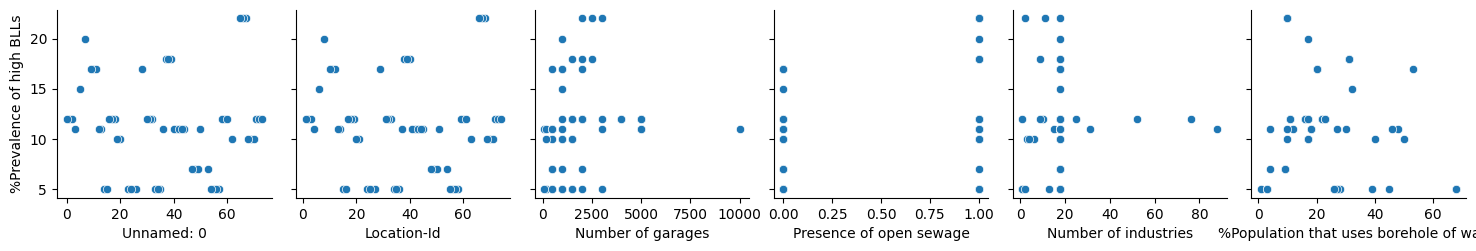

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining X_train and y_train into a single DataFrame
df = pd.concat([X_train, y_train], axis=1)

# Created a pair plot
sns.pairplot(df, x_vars=X_train.columns, y_vars=['%Prevalence of high BLLs'], kind='scatter', height=2.5)
plt.show()

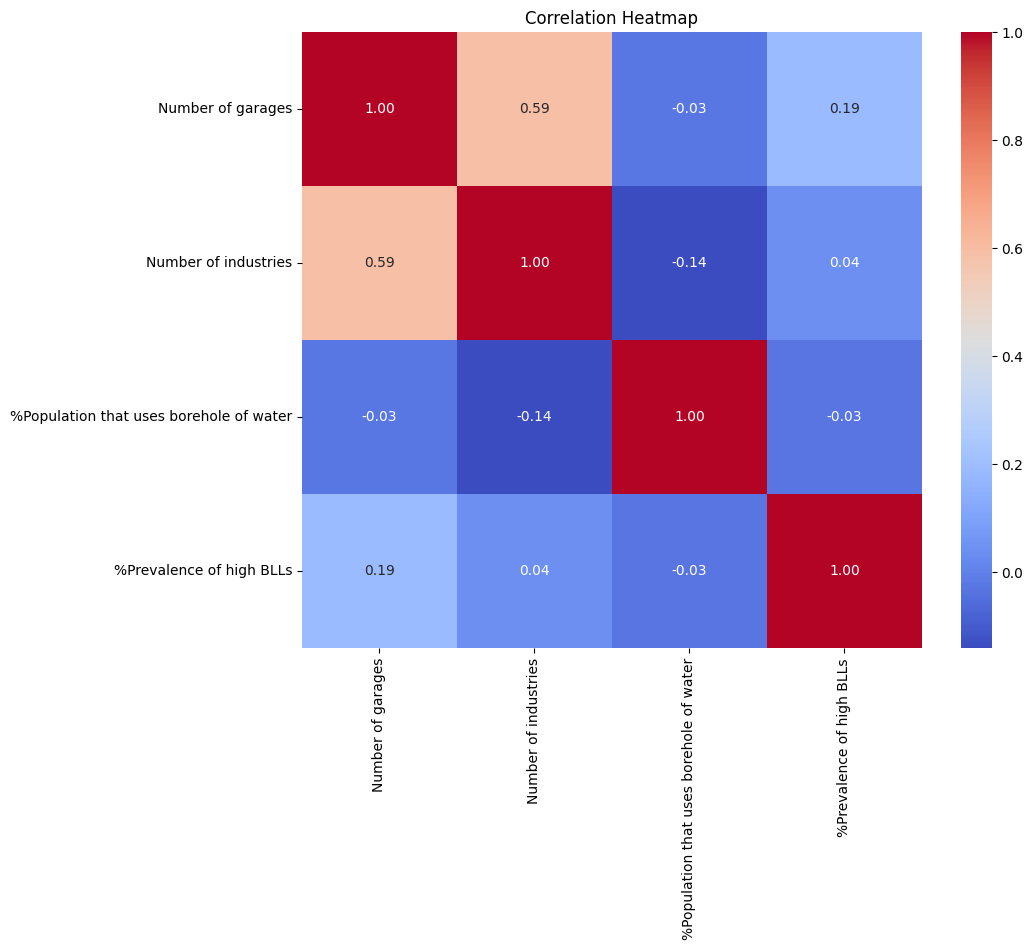

In [5]:
selected_features = ['Number of garages', 'Number of industries', '%Population that uses borehole of water', '%Prevalence of high BLLs']

selected_data = data[selected_features]
correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.datasets as datasets
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [7]:

numerical_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns

encoder = OneHotEncoder(drop='first', sparse=False)
data_encoded = encoder.fit_transform(X[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_cols)

data_encoded = pd.DataFrame(data_encoded, columns=encoded_feature_names)

numerical_data = X.select_dtypes(include=[np.number])
X = pd.concat([numerical_data, data_encoded], axis=1)

# Create a pipeline with preprocessing and Random Forest Classifier
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=123))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

/home/student/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/student/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Model Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Accuracy: 0.8
Confusion Matrix:
 [[2 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0]
 [0 0 2 0 1 0 0 0]
 [0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 1 0 0 1]]
Classification Report:
               precision    recall  f1-score   support

           5       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3
          10       0.67      0.67      0.67         3
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          20       1.00      0.50      0.67         2

    accuracy                           0.80        15
   macro avg       0.83      0.73      0.77        15
weighted avg       0.93      0.80  

/home/student/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/student/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/student/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# import joblib

# joblib.dump(nb_model, 'neza_model.joblib')

In [9]:
# !pip install colabcode
# !pip install fastapi
# !pip install python-multipart

In [10]:
from colabcode import ColabCode
from fastapi import FastAPI

In [11]:
cc = ColabCode(port = 12000, code=False)

app = FastAPI()

In [12]:
%%writefile models.py
from pydantic import BaseModel, conlist
from typing import List
from fastapi import FastAPI


class Iris(BaseModel):
    data: List[int]
        
app = FastAPI(title="ML model as API", description="With FastAPI and Colab")

model = None

Overwriting models.py


In [13]:
# !pip install --upgrade pydantic
import pickle 
import logging
from fastapi import FastAPI, File, UploadFile
from models import Iris
import io

my_logger = logging.getLogger("my_logger")

my_logger.setLevel(logging.ERROR)

handler = logging.FileHandler("my_log_file.log")
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
my_logger.addHandler(handler)

app = FastAPI(title = "Lead Exposure Prediction Model As API", description = "With FastAPI and Colab")

model = None

@app.on_event("startup")
def load_model():
    global model
    try:
        model = joblib.load(open("neza_model.joblib", "rb"))
    except Exception as e:
        my_logger.error(f"Error loading the model: {str(e)}")
        
def make_predictions(file_content):
    csv_data = pd.read_csv(io.StringIO(file_content.decode('utf-8')))
    predictions = model.predict(csv_data)
    return predictions.tolist()
    
@app.post("/api", tags=["prediction"])
async def post_predictions(file: UploadFile):
    try:
        file_content = await file.read()
        predictions = make_predictions(file_content)
        return {"prediction": predictions}
    
    except Exception as e:
        my_logger.error(f"Error during prediction: {str(e)}")
        return {"prediction": "error"}
    
async def get_predictions(file_content: str):
    try:
        predictions = make_predictions(file_content)
        return {"prediction": predictions}
    except Exception as e:
        my_logger.error(f"Error during prediction: {str(e)}")
        return {"prediction": "error"}